<a href="https://colab.research.google.com/github/beatricekiplagat/Hass-Consulting-Limited/blob/main/Hass_Consulting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Regression Analysis

As a Data Scientist for Hass Consulting Company which is a real estate leader with over 25 years of experience, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> I am required to perform modeling using the following regression techniques then evaluate their performance:
* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

> I will then provide my observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

### b) Defining the Metric for Success

> Our oroject would be deemed successful if we are able to predict house prices using the regression models, evaluate them and give recommendations on the suitability of each.

### c) Recording the Experimental Design

We shall follow the following steps during this analysis:
1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Tidying the Data & Merging
5. Performing EDA
6. Regresion Analysis
7. Evaluation
8. Recommendations
9. Challenging the Solution

## 2. Reading the Data

In [ ]:
# Importing the libraries to be used
#
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# reading our csv files
df = pd.read_csv('house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the Data

In [ ]:
# Previewing the first 10 rows
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the last 10 rows
#
df.tail()
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Checking the shape of our data
#
df.shape


(21613, 20)

> Our dataset has 21,613 entries and 20 columns

In [ ]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

> Our columns all have the correct datatypes

## 4. Tidying the Dataset

In [ ]:
# Checking for duplicates
#
df.duplicated().sum()

3

> We have 3 duplicated values, which we shall proceed to drop

In [ ]:
# Drop our duplicates
#
df.drop_duplicates(inplace = True)

In [ ]:
# Confirm that there are no duplicates
#
df.duplicated().sum()

0

> We have no more duplicates

In [ ]:
# Checking for null values
#
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> We have no null values

In [ ]:
# We shall now proceed to do data cleaning using the data cleaning principles.
# Dropping irrelevant columns: we do not need the id column for our analysis. We also do not need the longitude and latitude as the zipcode already has location info. We shall drop them all
#
df.drop(['id','lat','long'], inplace = True, axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


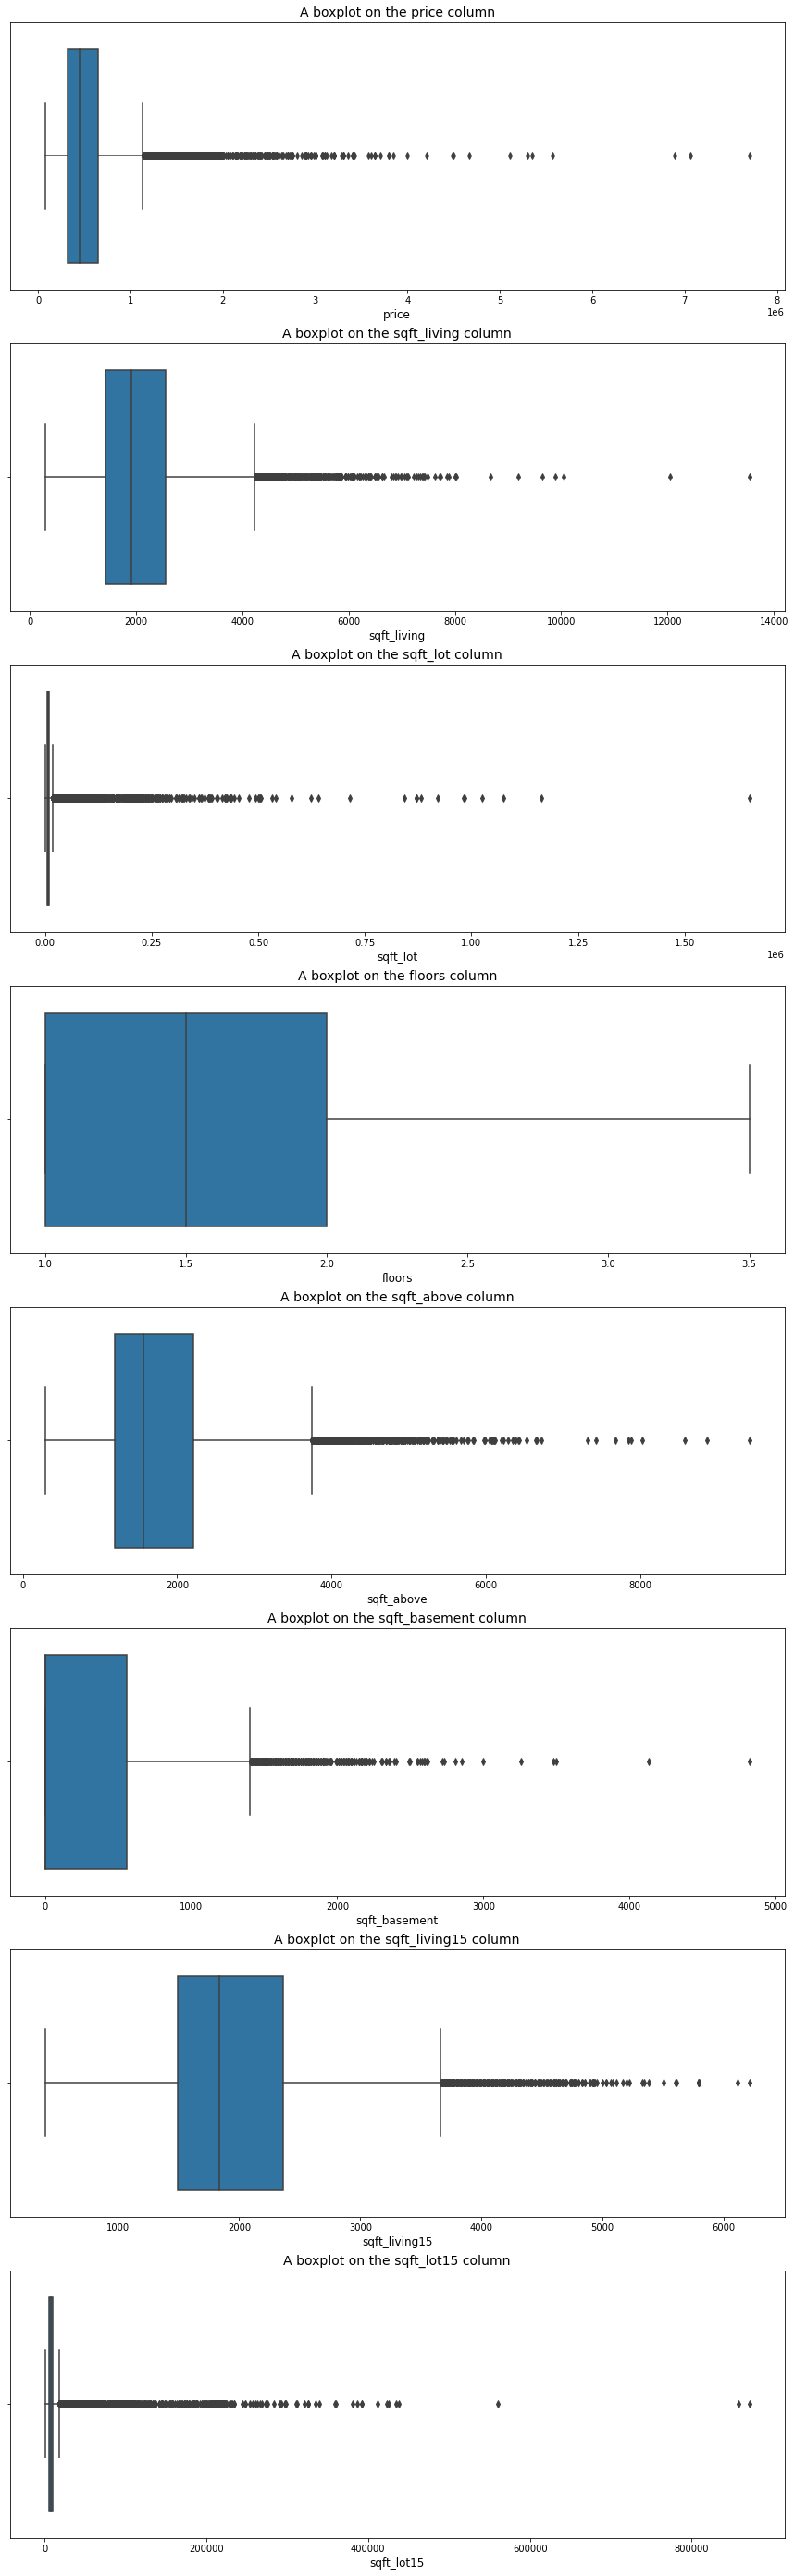

In [ ]:
# Checking for Outliers & Anomalies

#
col_names = ['price','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize = (15,50))

for i, col_val in enumerate(col_names):

  sns.boxplot(x = df[col_val], ax=ax[i])
  ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=12)
  

> We have alot of outliers on our data. We wont drop the outliers for now as that may heavily skew our data wrongly

## 5. Exploratory Data Analysis

### a) Univariate Analysis

#### Summary Statistics

In [ ]:
# Getting summary statistics for our numerical columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [ ]:
# Measures of Central Tendency
#
print('The means of our numerical values are \n', df.mean())
print('\n The medians of our numerical values are\n', df.median())
print('\n The modes of our numerical values are \n', df.mode())

# Measures of Dispersion
print('\nThe standard deviations of our numerical values are\n', df.std())
print('\n The variances of our numerical values are\n',df.var())
print('\n The ranges of our numerical values are\n',df.max()-df.min())
print('\n The kurtosis of our numerical values are\n',df.kurt())
print('\n The skewness of our numerical values are\n',df.skew())

The means of our numerical values are 
 price            540178.944840
bedrooms              3.370847
bathrooms             2.114739
sqft_living        2079.881212
sqft_lot          15108.289820
floors                1.494239
waterfront            0.007543
view                  0.234197
condition             3.409440
grade                 7.656779
sqft_above         1788.347894
sqft_basement       291.533318
yr_built           1971.003609
yr_renovated         84.322351
zipcode           98077.945673
sqft_living15      1986.518695
sqft_lot15        12769.031976
dtype: float64

 The medians of our numerical values are
 price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7619.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
grade                 7.00
sqft_above         1560.00
sqft_basement         0.00
yr_built           1975.00
yr_renovated          0.

> From the measures above, we a re able to get the summary statistics of our dataset. We can see that the mean price is 540,178.94, we have a median of 450,000 and most common pricing for houses is 350,000.
> Some of our columns such as waterfront, sqft_lot, qft_lot15 are heavily platykurtic, which may be due to the outliers. Zip code and floors are mesokurtic. 
> Our columns are all positively skewed.

#### Plots

Text(0.5, 1.0, 'A plot on the number of bedrooms')

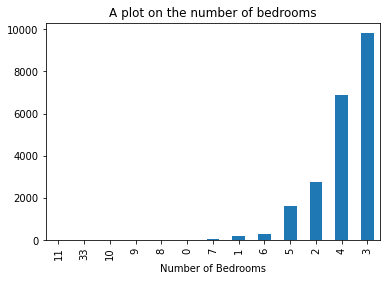

In [ ]:
# Bar graph showing distribution of number of bedrooms
#
df.bedrooms.value_counts().sort_values().plot.bar()
plt.xlabel('Number of Bedrooms')
plt.title('A plot on the number of bedrooms')

Text(0.5, 1.0, 'A plot on the number of floors')

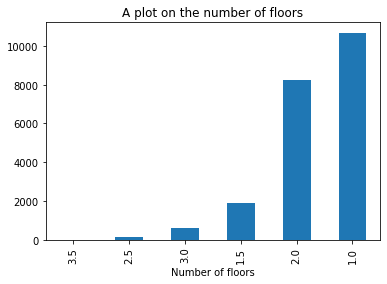

In [ ]:
# Bar graph showing distribution of number of floors
#
df.floors.value_counts().sort_values().plot.bar()
plt.xlabel('Number of floors')
plt.title('A plot on the number of floors')

### b) Bivariate Analysis

In [ ]:
# Check for correlation
#
correlation = df.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.713208,0.119265


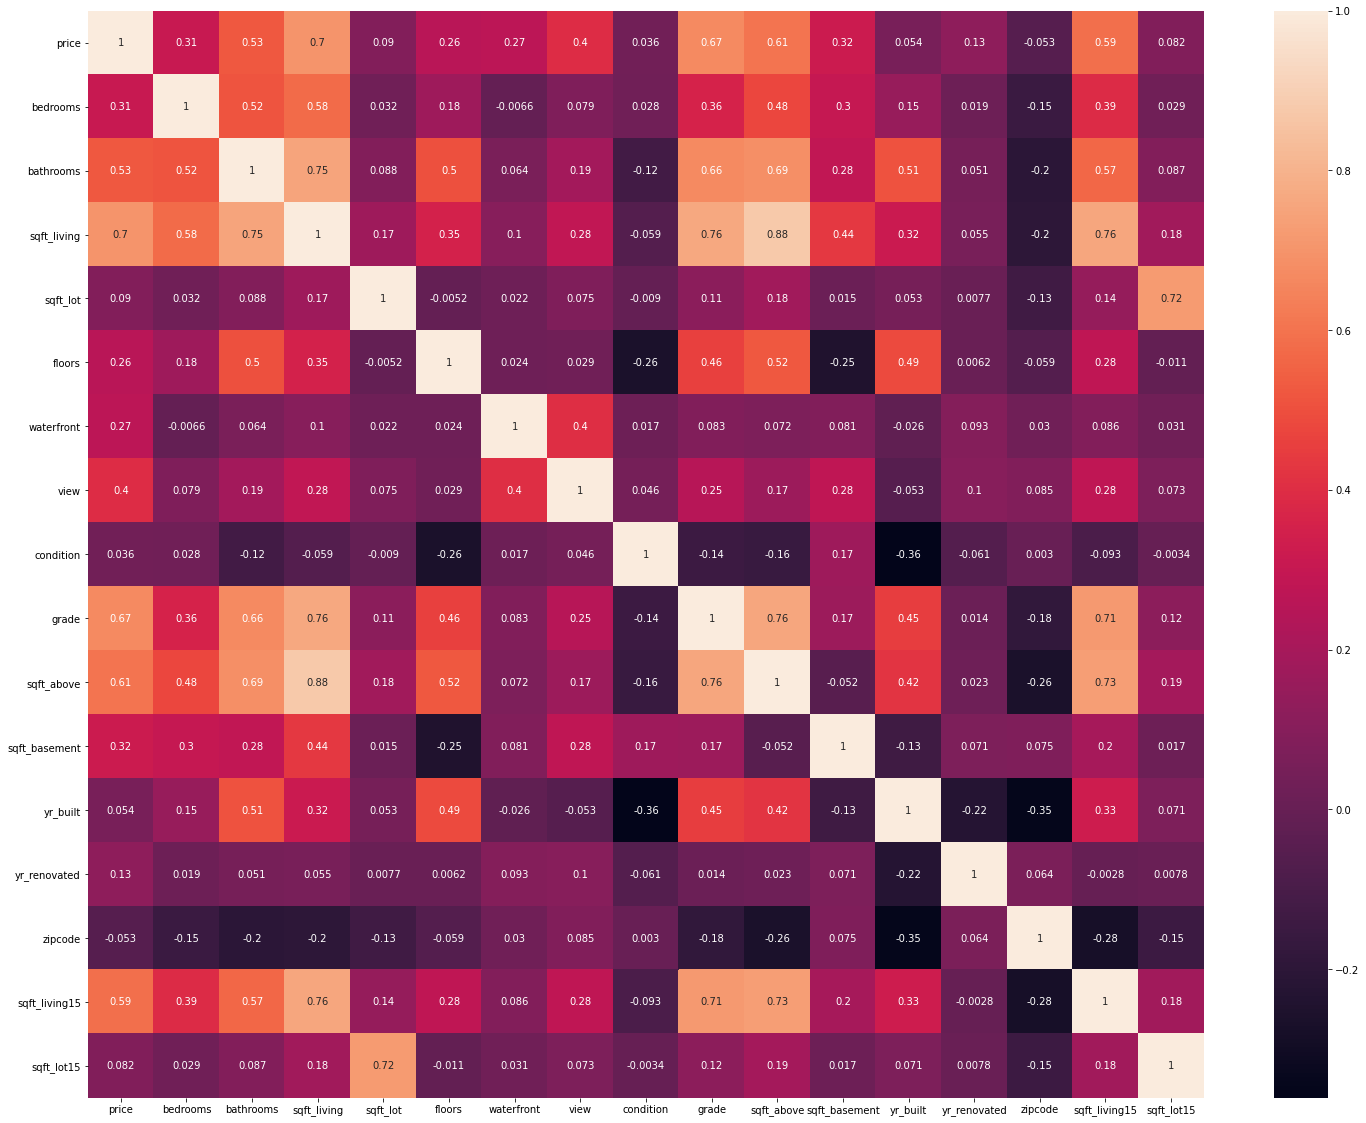

In [ ]:
# Plotting a correlation heatmap
#
plt.figure(figsize = (25,20))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

> Most of our variables are positively correlated as evidenced on our heatmap except for variables such as sqft_living15 with yr_renovated & zipcode. Some variables such as sqqft_above and sqft_living have a high positive correlation. 

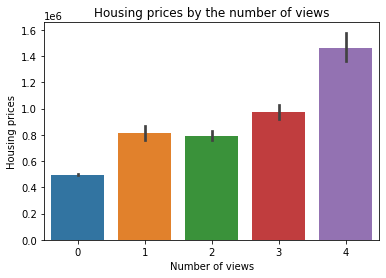

In [ ]:
# Ploting relationship between housing prices and number of views
#
df_1 = df.groupby('price').sum()
df_1 = df_1.reset_index(inplace=True)

sns.barplot(x = df['view'], y = df['price'], data=df_1)
plt.xlabel('Number of views')
plt.ylabel('Housing prices')
plt.title('Housing prices by the number of views')
plt.show()

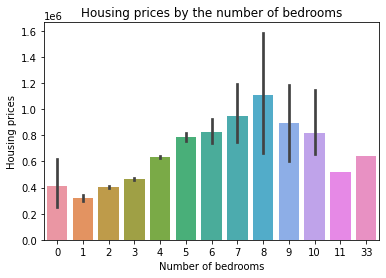

In [ ]:
# Ploting relationship between housing prices and number of views
sns.barplot(x = df['bedrooms'], y = df['price'], data=df_1)
plt.xlabel('Number of bedrooms')
plt.ylabel('Housing prices')
plt.title('Housing prices by the number of bedrooms')
plt.show()

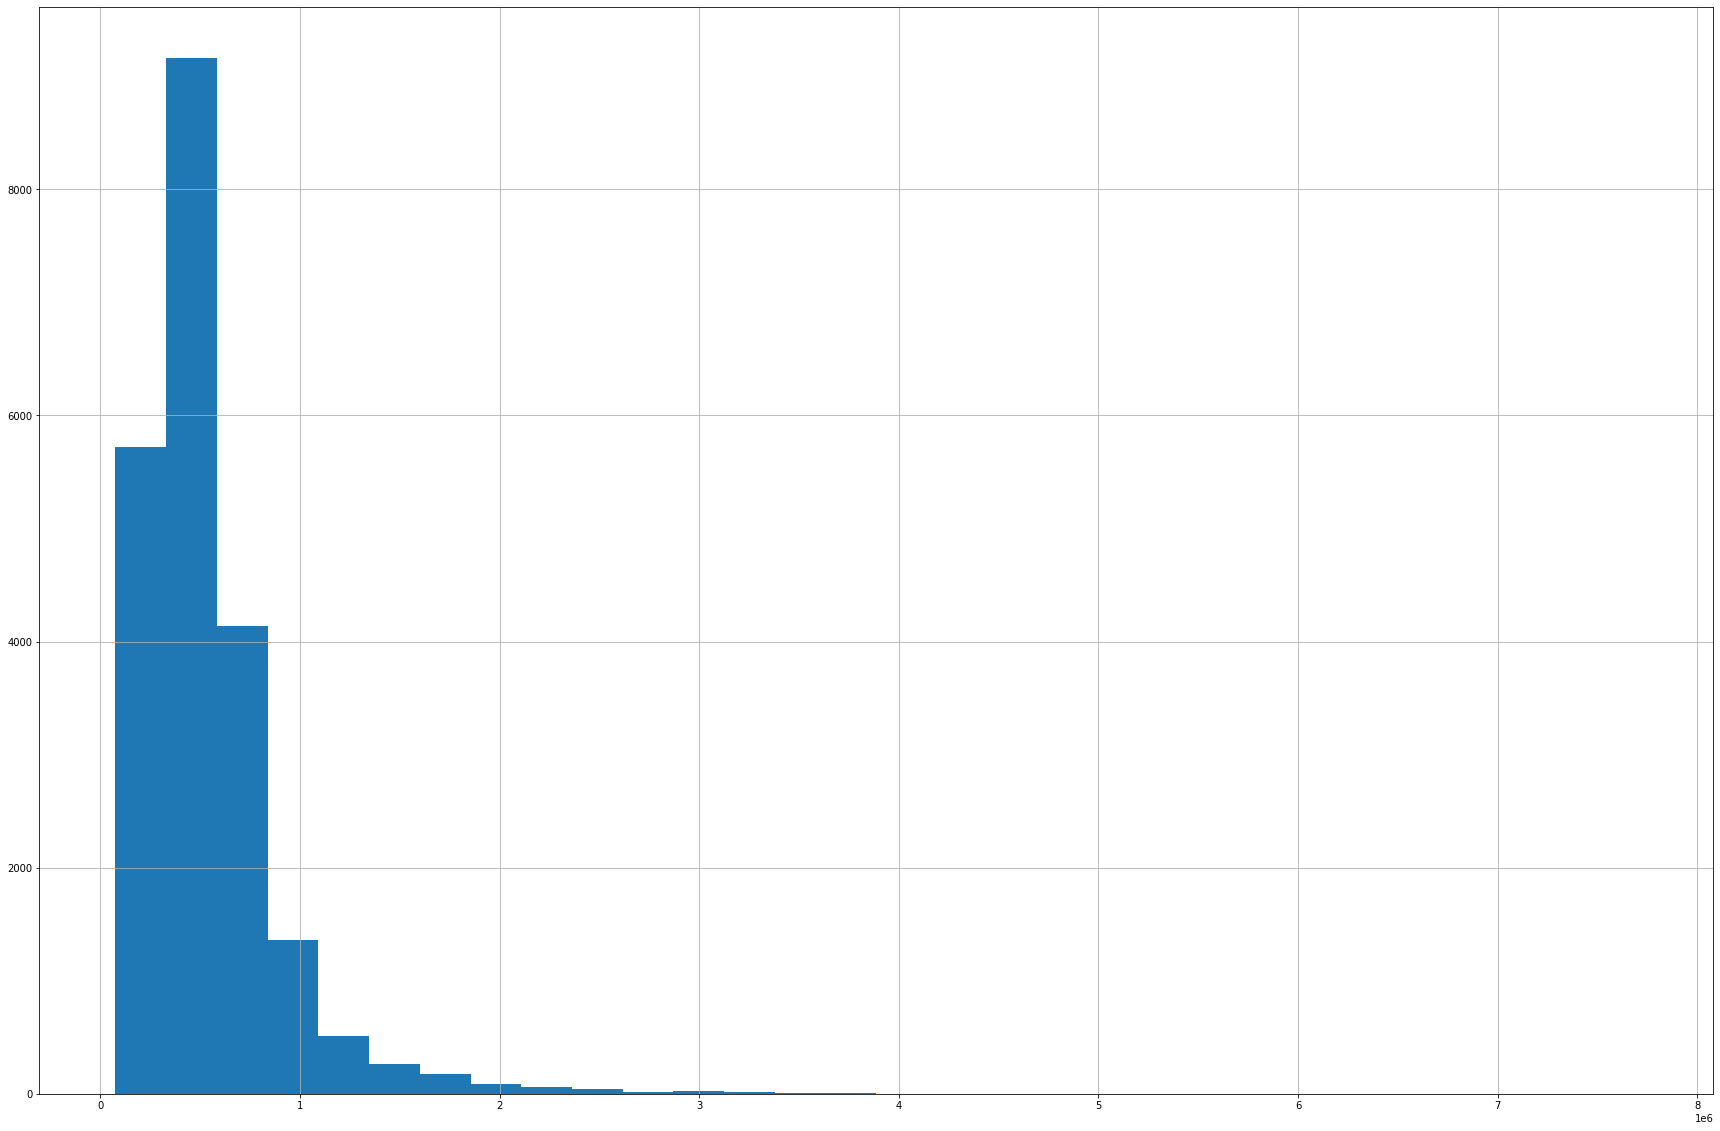

In [ ]:
# Checking distribution of price
#
# Plotting a histogram for the price and the living room area.

df['price'].hist(bins=30, figsize=(30, 20))

## 6. Regression Analysis

In [ ]:
# Creating a copy of our dataset
#
df1 =df.copy()

In [ ]:
# Encoding zipcode column
#
le = LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])

In [ ]:
# Defining the X and y variables
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
# Multicollinearity
# We shall use the correlation above to check for multicollinearity using the VIF Score
#
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,2.888714,0.287686,-0.276700,-7.273479e-01,0.000809,-0.115057,-0.393698,-0.261704,-0.099753,-1.107822,-3.897470e-01,-2.325536e-01,0.826225,-0.032560,0.002942,-0.133394,0.118261
bedrooms,0.287686,1.678357,-0.487819,-6.881658e-01,0.048661,0.042033,0.023109,0.082270,-0.063295,0.206457,-3.627948e-01,-2.095190e-01,0.209197,0.041174,0.085208,0.020450,0.097516
bathrooms,-0.276700,-0.487819,3.374934,-3.078119e+00,-0.018698,-0.673066,0.047374,-0.015460,-0.125453,-0.183428,1.619510e+00,4.534958e-01,-0.990843,-0.254325,0.011224,0.111523,0.065752
sqft_living,-0.724520,-0.688204,-3.080432,1.808269e+13,-0.064448,2.722855,0.020181,0.050914,-0.145246,-1.728783,-1.630373e+13,-8.713486e+12,0.332886,0.173206,-0.451386,-0.995200,-0.061693
sqft_lot,0.000809,0.048661,-0.018698,-6.520384e-02,2.091008,0.061771,0.028803,-0.058732,0.027514,-0.013352,-1.721284e-01,2.295295e-03,0.051028,0.015649,0.061440,0.142506,-1.472100
floors,-0.115057,0.042033,-0.673066,2.718038e+00,0.061771,1.989834,0.008847,-0.023757,0.100809,-0.253290,-2.866481e+00,-6.922938e-01,-0.440269,-0.069470,-0.263946,0.298316,0.085222
waterfront,-0.393698,0.023109,0.047374,2.014822e-02,0.028803,0.008847,1.257111,-0.459442,0.000267,0.197358,1.609611e-02,6.440488e-02,-0.128886,-0.061022,0.013788,0.078968,-0.032465
view,-0.261704,0.082270,-0.015460,5.165668e-02,-0.058732,-0.023757,-0.459442,1.443403,-0.018427,-0.068167,8.422296e-02,-2.266967e-01,0.067274,-0.038540,-0.141903,-0.287403,-0.014741
condition,-0.099753,-0.063295,-0.125453,-1.458355e-01,0.027514,0.100809,0.000267,-0.018427,1.249504,0.001895,2.131294e-01,-2.616837e-03,0.515845,0.205507,0.178367,0.085345,-0.034429
grade,-1.107822,0.206457,-0.183428,-1.724519e+00,-0.013352,-0.253290,0.197358,-0.068167,0.001895,3.675607,4.630071e-01,5.165427e-01,-0.772434,-0.035964,-0.146636,-0.814080,0.068510


> The VIF score for each variable is found alongside the diagonal. None of our scores have a VIF of above 5, thus we can conclude that there is very low multicollinearity in independent variables and thus can be ignored. Had it been 5 or more, that would have been an issue for us.


### a) Multiple Linear Regression:
This is a regression method that assumes that there exists a linear relationship between your dependent and independent variables. It also assumes that the residuals are normally distributed and that our independent variables are not highl correlated in our dataset. It also assumes that the variance of error terms are honogenous.

In [ ]:
#Split data into train and test v
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

#Fitting the data
#
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#Print the regressor intercept and coefficients 
#
print( regressor.intercept_)
print(regressor.coef_)

#Predict the prices using our using our test data
#
y_predict = regressor.predict(X_test)

6051697.917419397
[-3.94745773e+04  4.14060342e+04  1.11191987e+02 -6.02235882e-03
  3.09142186e+04  5.44664159e+05  4.41794620e+04  1.90867559e+04
  1.18869825e+05  4.88489661e+01  6.23430206e+01 -3.49278210e+03
  1.16075344e+01 -1.62559054e+01  2.56168730e+01 -5.47325256e-01]


In [ ]:
# Comparing the actual vs the predicted values
# 
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict })
comparison_df.describe()

,Actual,Predicted
count,4.322000e+03,4.322000e+03
mean,5.493199e+05,5.424826e+05
std,3.765819e+05,2.988261e+05
min,8.200000e+04,-1.432117e+05
25%,3.246000e+05,3.397466e+05
50%,4.585000e+05,4.809418e+05
75%,6.500000e+05,6.724564e+05
max,5.570000e+06,3.103106e+06


> Our predictions seem to be close to the actual data, except for the min and max values, which is okay

In [ ]:
#Calculating RMSE, MSE & R score
#

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Mean Squared Error:', r2_score(y_test, y_predict))

Root Mean Squared Error: 217050.20182916627
Mean Squared Error: 47110790114.08181
Mean Squared Error: 0.6677217222450296


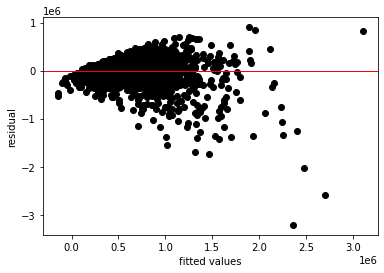

In [ ]:
# Residual Plots & Heteroscedasticity
# Plotting our residual plots
#
residuals = np.subtract(y_predict, y_test)
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

> Our residuals are randomnly scattered around 0, thus our model's predictions are correct on average

In [ ]:
# Using Bartlett test to check the homogeneity of our dataset
#
residuals = np.subtract(y_predict, y_test)

pd.DataFrame(residuals).describe()

residuals.mean()

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

degree_of_freedom = len(y_predict) - 1

probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
    print('There are patterns to the variance of the data, thus our model should be reassesed')
if (test_result < critical_value):
  print('The variances are homogenous across our data')

The variances are homogenous across our data


> From the assumptions listed above, we can see that our model satisfies the assumptions for multiple linear regression. There is no multicollinearity as evidenced by our VIF scores less than 5. The variances of our errors are also homogenous, as seen in Bartlett's test above. The residual plot above, has also shown that that our residuals are randomnly distributed. However, our RMSE is quite high for this model.

### b) Quantile Regression

Quantile regression is always preferred when heteroscedasticity is present in data and the distribution of our dependent variables can be described across various quantiles. It is more robust to outliers and is more useful than linear regression if your data is skewed. The coefficients for this method should differ significantly from those of the linear regression for it to be justifiable. It's assumptions are also similar to those of linear regression.


In [ ]:
# Defining our variables
#
X = df.drop(['price'],axis=1)
Y = df['price']

In [ ]:
# Getting the shape of the predictor variables
X.shape

(21610, 16)

In [ ]:
# Adding an extra array to our predictor variables to be able to perfrom a mathematical operation in the quantile regression
# Defining the mean and standard deviation of our extra array to be a normal distribution of mean 0 and standard deviation of 0.001 to reduce any manipulation of our data.
mu ,sigma = 0, 0.001
#Generating a normal random variables with the same shape as our dataset
noise = np.random.normal(mu, sigma , [21610,16])

In [ ]:
#Adding the noise to our predictor variables
X = X + noise

In [ ]:
#Performing a qauntile regression of the 50th percentile.
import statsmodels.formula.api as smf 
mod =smf.quantreg('y ~ X',df)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3880
Model:                       QuantReg   Bandwidth:                   2.445e+04
Method:                 Least Squares   Sparsity:                    3.504e+05
Date:                Sat, 24 Jul 2021   No. Observations:                21610
Time:                        19:20:55   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.137e+06   1.19e+05     18.008      0.000     1.9e+06    2.37e+06
X[0]       -2.411e+04   1646.278    -14.644      0.000   -2.73e+04   -2.09e+04
X[1]         995.2191   2831.606      0.351      0.725   -4554.937    6545.376
X[2]        8283.7840     33.327    248.557      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


Since we did not drop our outliers and this method is more robust to outliers, this migt make it more justifiable to use this method. The assumptions for linear regression as listed previously, have been satisfied.

### c) Ridge Regression

This is a regularization method that penalises large coefficients so as to avoid overfitting of data. The assumptions for ridge regression are similar to linear regression, such as homogeneity of variances across samples, independence and linearity. However, as ridge regression does not provide confidence limits, the distribution of errors to be normal need not be assumed.

In [ ]:
# Creating our baseline regression model
#
X = df.drop(['price'],axis=1)
y = df['price']
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)
# Fitting the data
#
ridge = Ridge(normalize=True)
ridge.fit(X,y)

6199256.104172132
[-3.93131003e+04  4.56943349e+04  1.09330331e+02 -2.08642193e-03
  2.69689461e+04  5.78742159e+05  4.33936957e+04  1.95680525e+04
  1.19824965e+05  5.15433380e+01  5.77869933e+01 -3.57270424e+03
  1.03591285e+01 -1.37945946e+00  2.48785975e+01 -5.50273246e-01]


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
#Calculating  MSE
#
baseline_model = (np.sqrt(mean_squared_error(y_true = y, y_pred = ridge.predict(X))))
baseline_model

236760.49098304706

> This will be our indicator to determine if the regularized ridge regression model is superior or not.

In [ ]:
# Hyperparameter tuning
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)
#Standardizing our predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
# We'll define lambda as alpha then grid search between the -5 and 2 values then used MSE as the value to look at.
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid = {'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Fitting our variables
#
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

best_params_ tells us to set alpha as 0.001

In [ ]:
# Creating a second model to find the best possible mean squared error using best_score
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = ridge.predict(X_test))))
print("The RMSE of the ridge model is: ",second_model)

The RMSE of the ridge model is:  417470097.7320135


In [ ]:
# Finding out the score of the ridge regression model
#
ridge.score(X_test,y_test)

-1281554.3131297394

> This model has an R2 score of 66.15%

In [ ]:
#Printing out the variable coefficients of the ridge model.
#

coef_dict_baseline = {}
for coef,feat in zip(ridge.coef_,X.columns):
  coef_dict_baseline[feat] = coef 
coef_dict_baseline 

{'bathrooms': 32428.139865323574,
 'bedrooms': -37593.450952942345,
 'condition': 11587.432817939603,
 'floors': 16261.598947079874,
 'grade': 140478.5881785726,
 'sqft_above': 64845.559718818186,
 'sqft_basement': 39993.805021297,
 'sqft_living': 77777.12649777568,
 'sqft_living15': 14553.381313109518,
 'sqft_lot': -83.79735522966824,
 'sqft_lot15': -14648.00868885603,
 'view': 34698.09127192108,
 'waterfront': 47412.89416227505,
 'yr_built': -104141.43796480147,
 'yr_renovated': 3183.7783306957617,
 'zipcode': -859.272999994862}

The RMSE was very high, just as in the previous models. However, it penalized the constant coefficients better than the previous regressions. However, it doesn't perform feature selection like Lasso regression.

### d) Lasso Regression
This method is best for high collinearity. It performs L1 regularisation which adds a penalty equal to the absolute value of the magnitude of the coefficients. The assumptions are similar to the linear regression models.

In [ ]:
# Defining our variables
#
X = df.drop(['price'],axis=1)
y = df['price']
lasso = linear_model.Lasso()

In [ ]:
# Fitting our data in a lasso regression
#
lasso.fit(X,y)
#Calculating the root mean squared error

print('lasso RMSE: ', np.sqrt(mean_squared_error(y, lasso.predict(X))))

lasso RMSE:  216153.7035927398


In [ ]:
# Hyperparameter tuning
#
# Defining our variables
X = df.drop(['price'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Standardizing our predictor variables
#
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Defining the alpha parameters
#
parameters = {'alpha':np.concatenate((np.arange(0.1,2,0.1),np.arange(2,5,0.5),np.arange(5,30,1)))}

In [ ]:
# Grid Searching for the best parameters & cross validating with 30 models
#
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso,parameters,scoring='r2',n_jobs=1,refit=True,cv=30)

In [ ]:
# Fitting the hyperparameters on a lasso model
#
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Fitting the hyperparameters on a lasso regression model
#
lasso = linear_model.Lasso(normalize=True,alpha=29.0)
lasso.fit(X_train,y_train)

Lasso(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Printing out the RMSE for the lasso model
#
print('lasso RMSE: ',np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))))

lasso RMSE:  298338578.5898798


In [ ]:
# Finding out the score of the lasso regression model
#
lasso.score(X_test,y_test) 

-654492.6552455759

> This model fitted 65.91% of our data

In [ ]:
# Printing out the columns and the respective coefficients.
#
coef_dict_baseline = {}
for coef,feat in zip(lasso.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 26743.22705626591,
 'bedrooms': -27739.66318130738,
 'condition': 8072.818449669942,
 'floors': 9805.434952252277,
 'grade': 140250.50659865365,
 'sqft_above': 0.0,
 'sqft_basement': 1583.887472801132,
 'sqft_living': 148852.81819924738,
 'sqft_living15': 10195.19254311457,
 'sqft_lot': -0.0,
 'sqft_lot15': -10318.063036928634,
 'view': 35338.670180585126,
 'waterfront': 45229.558871808724,
 'yr_built': -96373.77871457551,
 'yr_renovated': 1510.4494870577726,
 'zipcode': 0.0}

### e) Elastic Net Regression

In [ ]:
# Baseline model
# Defining our variables.
#
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
# Fitting our predictor variables in an ElasticNet regression
#
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
elastic.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Finding the RMSE 
#
print('Elastic Net MSE:' ,np.sqrt(mean_squared_error(y_true = y,y_pred=elastic.predict(X))))

Elastic Net MSE: 367295.6562423898


In [ ]:
# Hyperparameter tuning

# Splitting our data into a train and test model
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
# Standardizing our predictor variables
# 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
#Searching for the best parameters for both parameters
#
elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Fitting the data into our grid
#
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# Getting the best parameters for our model
#
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
# Fitting the best parameters to our model
#
elastic = ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Printing out the RMSE 
#
print('Elastic Net RMSE:' ,np.sqrt(mean_squared_error(y_true = y_test,y_pred=elastic.predict(X_test))))

Elastic Net RMSE: 394654549.2823781


In [ ]:
#Printing out the coefficients for our predictor variables.
#
coef_dict_baseline = {}
for coef,feat in zip(elastic.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline  

{'bathrooms': 31338.21343843636,
 'bedrooms': -34199.78112580093,
 'condition': 12805.35811866268,
 'floors': 16063.757423339815,
 'grade': 130963.51491411222,
 'sqft_above': 63573.646449201566,
 'sqft_basement': 39455.03533334449,
 'sqft_living': 76370.1320817678,
 'sqft_living15': 19903.400505614747,
 'sqft_lot': -133.48651364611732,
 'sqft_lot15': -13900.50921159577,
 'view': 35660.881600316294,
 'waterfront': 46249.79727735561,
 'yr_built': -96014.23796159924,
 'yr_renovated': 5054.176431971831,
 'zipcode': 1218.1097172841896}

In [ ]:
# Printing out how our model best fits our data 
#
elastic.score(X_test,y_test)

-1145303.1519047034

> Our elastic net R squared score is definitely not right, which may mean that we may need to refit our model.

## 7. Evaluation & Recommendation

 None of our scores have a VIF of above 5, thus we can conclude that there is very low multicollinearity in independent variables and thus can be ignored. Had it been 5 or more, that would have been an issue for us. The RMSEs from our different models are all consistently high, which begs the question as to whether we can use different variables to improve our model. The R2 for our models was 66.15% for ridge regression, 65.91% for Lasso.
 I would prefer the Lasso model as it did feature reduction andits r2 score is fair as compared to the other models.

# 9. Challenging the Solution
> We may need to get different variables that may make our predictions better, to get a lower RMSE for all of our models. 